In [1]:
# Import library
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

# Konversi ke DataFrame
df = pd.DataFrame(X, columns=feature_names)

In [9]:
# Menghitung Variance dari Setiap Fitur
variance = df.var()
print("\n Variance dari Setiap Fitur:")
print(variance)


 Variance dari Setiap Fitur:
mean radius                    12.418920
mean texture                   18.498909
mean perimeter                590.440480
mean area                  123843.554318
mean smoothness                 0.000198
mean compactness                0.002789
mean concavity                  0.006355
mean concave points             0.001506
mean symmetry                   0.000752
mean fractal dimension          0.000050
radius error                    0.076902
texture error                   0.304316
perimeter error                 4.087896
area error                   2069.431583
smoothness error                0.000009
compactness error               0.000321
concavity error                 0.000911
concave points error            0.000038
symmetry error                  0.000068
fractal dimension error         0.000007
worst radius                   23.360224
worst texture                  37.776483
worst perimeter              1129.130847
worst area                 

In [11]:
# Menghitung Covariance Matrix
covariance_matrix = df.cov()
print("\n Covariance Matrix:")
print(covariance_matrix)


 Covariance Matrix:
                         mean radius  mean texture  mean perimeter  \
mean radius                12.418920      4.907582       85.447142   
mean texture                4.907582     18.498909       34.439759   
mean perimeter             85.447142     34.439759      590.440480   
mean area                1224.483409    485.993787     8435.772345   
mean smoothness             0.008454     -0.001415        0.070836   
mean compactness            0.094197      0.053767        0.714714   
mean concavity              0.190128      0.103692        1.387234   
mean concave points         0.112475      0.048977        0.802360   
mean symmetry               0.014273      0.008419        0.121922   
mean fractal dimension     -0.007754     -0.002321       -0.044859   
radius error                0.663650      0.329037        4.661401   
texture error              -0.189189      0.916695       -1.162988   
perimeter error             4.803550      2.449449       34.053028   

In [13]:
# Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Menghitung Eigenvalues & Eigenvectors dari Covariance Matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("\n Eigenvalues:")
print(eigenvalues)

eigenvectors_df = pd.DataFrame(eigenvectors, columns=feature_names, 
                               index=[f"PC{i+1}" for i in range(len(eigenvectors))])
print("\n Eigenvectors (Arah dari Principal Components):")
print(eigenvectors_df)


 Eigenvalues:
[4.43782605e+05 7.31010006e+03 7.03833742e+02 5.46487379e+01
 3.98900178e+01 3.00458768e+00 1.81533030e+00 3.71466740e-01
 1.55513547e-01 8.40612196e-02 3.16089533e-02 7.49736514e-03
 3.16165652e-03 2.16150395e-03 1.32653879e-03 6.40269304e-04
 3.74883320e-04 2.35169626e-04 1.84583467e-04 1.64180064e-04
 7.81102011e-05 5.76111660e-05 3.49172775e-05 2.83952689e-05
 1.61463677e-05 1.24902419e-05 7.01997261e-07 3.68048171e-06
 2.84790425e-06 2.00491564e-06]

 Eigenvectors (Arah dari Principal Components):
       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1   5.086232e-03  9.287056e-03       -0.012343  -0.034238        -0.035456   
PC2   2.196570e-03 -2.881607e-03       -0.006355  -0.362415         0.443187   
PC3   3.507633e-02  6.274808e-02       -0.071669  -0.329281        -0.313383   
PC4   5.168265e-01  8.518237e-01       -0.027894   0.039412         0.046038   
PC5   4.236945e-06 -1.481944e-05        0.000073  -0.000344        -0.000579 

In [17]:
# PCA dengan 2 Komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [19]:
# Menampilkan Variance Ratio dari Setiap PC
explained_variance = pca.explained_variance_ratio_
print("\n Explained Variance Ratio (Kontribusi PC terhadap Variasi Data):")
print(explained_variance)


 Explained Variance Ratio (Kontribusi PC terhadap Variasi Data):
[0.44272026 0.18971182]


In [21]:
# Menampilkan Principal Components (Transformasi Data ke Ruang Baru)
principal_components_df = pd.DataFrame(pca.components_, 
                                       columns=feature_names, 
                                       index=["PC1", "PC2"])
print("\n Principal Components (Bobot Setiap Fitur dalam PC):")
print(principal_components_df)


 Principal Components (Bobot Setiap Fitur dalam PC):
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
PC1          0.239285        0.258400             0.260854       0.138167   
PC2          0.151892        0.060165            -0.034768       0.190349   

     mean fractal dimension  ...  worst radius  worst texture  \
PC1                0.064363  ...      0.227997       0.104469   
PC2                0.366575  ...     -0.219866      -0.045467   

     worst perimeter  worst area  worst smoothness  worst compactness  \
PC1         0.236640    0.224871          0.127953           0.210096   
PC2        -0.199878   -0.219352          0.172304           0.143593   

     worst concavity  worst concave points  worst symmetry  \
P

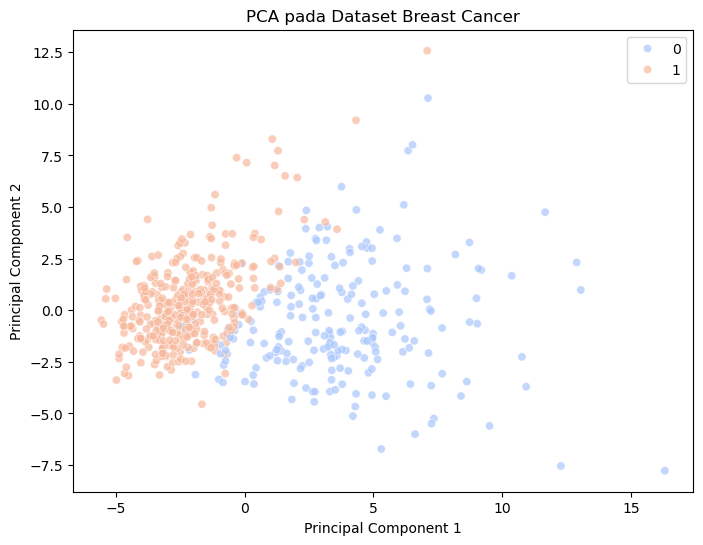

In [23]:
# Visualisasi PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA pada Dataset Breast Cancer')
plt.show()